### **IMPORT LIBRARY**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### **LOAD DATASET**

### Inserting dataset into dataframe

In [2]:
dfKonsumsi = pd.read_csv('Dataset/JumlahKonsumsi18-23.csv', delimiter=';')
dfKonsumsi

,Bahan Pangan,2018,2019,2020,2021,2022,2023
0,Beras,"88,3","83,4","82,2","81,4","80,6",81
1,Bawang Merah,"3,5","2,8","2,9","3,18","3,2",3
2,Bawang Putih,"2,8","2,3","2,3","2,66","2,75","2,6"
3,Cabai Rawit,"1,65","3,8","2,88","2,95","3,79","3,7"
4,Telur Ayam,"8,3","8,1","7,9","8,5","8,51","8,4"
5,Daging Sapi,"7,8","7,3","6,9","5,5","5,48","5,8"
6,Daging Ayam,"10,1","10,7",11,"10,8","10,81","11,2"


In [3]:
dfHarga = pd.read_csv('Dataset/HargaBahan18-23.csv', delimiter=';')
dfHarga

,Komoditas,2018,2019,2020,2021,2022,2023
0,Beras,9110,9237.50,"9287,5",8750.00,9354.16,11400.00
1,Daging Ayam,28920,21125.00,20254.16,22458.33,22779.16,24112.50
2,Daging Sapi,104140,104583.33,99008.33,101395.83,114166.67,120000.00
3,Telur Ayam,19230,19720.83,21345.83,19420.83,23341.67,25420.83
4,Bawang Merah,10690,15987.50,22750,19200.00,26195.83,22283.33
5,Cabai Merah,17140,23441.67,19216.67,23591.67,34883.33,27075.00
6,Cabai Rawit,20310,22054.16,18958.33,30920.83,38554.16,33291.67
7,Gula Pasir,9220,10120.83,12233.33,10875.00,11825.00,12666.67


In [4]:
dfProduksi = pd.read_csv('Dataset/JumlahProduksi18-23.csv', delimiter=';')
dfProduksi

,Bahan Pangan,2018,2019,2020,2021,2022,2023
0,Daging Sapi,"9272,92","7835,21","7355,14","7830,73","7899,9","7998,2"
1,Beras,"313785,9","397693,52","411862,52","422539,21","428585,74","414680,48"
2,Daging Ayam,"26484,88","56504,35","56977,21","55174,08","75710,7","70285,4"
3,Telur Ayam,"111612,84","62845,28","107288,18","129785,12",168303,"154407,4"
4,Bawang Merah,14950,16999,18811,29809,22307,32953
5,Cabai Rawit,10147,10040,15052,15933,15198,21384


In [5]:
dfPenghasilan = pd.read_csv('Dataset/PenghasilanMin18-23.csv', delimiter=';')
dfPenghasilan

,Yogyakarta,2018,2019,2020,2021,2022,2023
0,Upah,1454154,1570923,1704608,1765000,1840915,1981782


### Checking data types and missing values on each dataset

In [6]:
dfKonsumsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bahan Pangan  7 non-null      object
 1   2018          7 non-null      object
 2   2019          7 non-null      object
 3   2020          7 non-null      object
 4   2021          7 non-null      object
 5   2022          7 non-null      object
 6   2023          7 non-null      object
dtypes: object(7)
memory usage: 524.0+ bytes


In [7]:
dfHarga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Komoditas  8 non-null      object 
 1   2018       8 non-null      int64  
 2   2019       8 non-null      float64
 3   2020       8 non-null      object 
 4   2021       8 non-null      float64
 5   2022       8 non-null      float64
 6   2023       8 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 580.0+ bytes


In [8]:
dfProduksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bahan Pangan  6 non-null      object
 1   2018          6 non-null      object
 2   2019          6 non-null      object
 3   2020          6 non-null      object
 4   2021          6 non-null      object
 5   2022          6 non-null      object
 6   2023          6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes


In [9]:
dfPenghasilan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Yogyakarta  1 non-null      object
 1   2018        1 non-null      int64 
 2   2019        1 non-null      int64 
 3   2020        1 non-null      int64 
 4   2021        1 non-null      int64 
 5   2022        1 non-null      int64 
 6   2023        1 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 188.0+ bytes


### **DATA PREPROCESSING**

### Change the data type to _float_

In [10]:
def convertToFloat(x):
    if type(x) == str:
        return float(x.replace(',','.'))
    elif type(x) == int:
        return float(x)
    elif type(x) == float:
        return x

In [11]:
for column in dfHarga.columns[1:]:
    dfHarga[column] = dfHarga[column].apply(convertToFloat)
dfHarga

,Komoditas,2018,2019,2020,2021,2022,2023
0,Beras,9110.0,9237.50,9287.50,8750.00,9354.16,11400.00
1,Daging Ayam,28920.0,21125.00,20254.16,22458.33,22779.16,24112.50
2,Daging Sapi,104140.0,104583.33,99008.33,101395.83,114166.67,120000.00
3,Telur Ayam,19230.0,19720.83,21345.83,19420.83,23341.67,25420.83
4,Bawang Merah,10690.0,15987.50,22750.00,19200.00,26195.83,22283.33
5,Cabai Merah,17140.0,23441.67,19216.67,23591.67,34883.33,27075.00
6,Cabai Rawit,20310.0,22054.16,18958.33,30920.83,38554.16,33291.67
7,Gula Pasir,9220.0,10120.83,12233.33,10875.00,11825.00,12666.67


In [12]:
for column in dfKonsumsi.columns[1:]:
    dfKonsumsi[column] = dfKonsumsi[column].apply(convertToFloat)
dfKonsumsi

,Bahan Pangan,2018,2019,2020,2021,2022,2023
0,Beras,88.30,83.4,82.20,81.40,80.60,81.0
1,Bawang Merah,3.50,2.8,2.90,3.18,3.20,3.0
2,Bawang Putih,2.80,2.3,2.30,2.66,2.75,2.6
3,Cabai Rawit,1.65,3.8,2.88,2.95,3.79,3.7
4,Telur Ayam,8.30,8.1,7.90,8.50,8.51,8.4
5,Daging Sapi,7.80,7.3,6.90,5.50,5.48,5.8
6,Daging Ayam,10.10,10.7,11.00,10.80,10.81,11.2


In [13]:
for column in dfProduksi.columns[1:]:
    dfProduksi[column] = dfProduksi[column].apply(convertToFloat)
dfProduksi

,Bahan Pangan,2018,2019,2020,2021,2022,2023
0,Daging Sapi,9272.92,7835.21,7355.14,7830.73,7899.90,7998.20
1,Beras,313785.90,397693.52,411862.52,422539.21,428585.74,414680.48
2,Daging Ayam,26484.88,56504.35,56977.21,55174.08,75710.70,70285.40
3,Telur Ayam,111612.84,62845.28,107288.18,129785.12,168303.00,154407.40
4,Bawang Merah,14950.00,16999.00,18811.00,29809.00,22307.00,32953.00
5,Cabai Rawit,10147.00,10040.00,15052.00,15933.00,15198.00,21384.00


In [14]:
for column in dfPenghasilan.columns[1:]:
    dfPenghasilan[column] = dfPenghasilan[column].apply(convertToFloat)
dfPenghasilan

,Yogyakarta,2018,2019,2020,2021,2022,2023
0,Upah,1454154.0,1570923.0,1704608.0,1765000.0,1840915.0,1981782.0


### Merging all data

In [15]:
# Filter komoditas yang sama pada ketiga dataset
list_bahan = ['Beras', 'Bawang Merah', 'Cabai Rawit', 'Daging Ayam', 'Telur Ayam', 'Daging Sapi']
dfKonsumsi = dfKonsumsi[dfKonsumsi['Bahan Pangan'].isin(list_bahan)]
dfHarga = dfHarga[dfHarga['Komoditas'].isin(list_bahan)]
dfProduksi = dfProduksi[dfProduksi['Bahan Pangan'].isin(list_bahan)]

In [16]:
# Melakukan melt pada masing-masing dataset
dfKonsumsi_melt = pd.melt(dfKonsumsi, id_vars=["Bahan Pangan"], var_name="Tahun", value_name="Jumlah Konsumsi")
dfHarga_melt = pd.melt(dfHarga, id_vars=["Komoditas"], var_name="Tahun", value_name="Harga")
dfProduksi_melt = pd.melt(dfProduksi, id_vars=["Bahan Pangan"], var_name="Tahun", value_name="Produksi")
dfPenghasilan_melt = pd.melt(dfPenghasilan, id_vars=["Yogyakarta"], var_name="Tahun", value_name="Penghasilan Minimum")

In [17]:
# Mengganti nama kolom untuk konsistensi
dfKonsumsi_melt.rename(columns={"Bahan Pangan": "Komoditas"}, inplace=True)
dfProduksi_melt.rename(columns={"Bahan Pangan": "Komoditas"}, inplace=True)

In [18]:
# Menggabungkan dataset berdasarkan kolom "Komoditas" dan "Tahun"
df_merged = pd.merge(dfHarga_melt, dfKonsumsi_melt, on=["Komoditas", "Tahun"], how='outer')
df_merged = pd.merge(df_merged, dfProduksi_melt, on=["Komoditas", "Tahun"], how='outer')
df_merged = pd.merge(df_merged, dfPenghasilan_melt, on='Tahun', how='left')

### Delete unused columns

In [19]:
# Menggabungkan "Komoditas" dan "Tahun" menjadi satu kolom
df_merged["Komoditas"] = df_merged["Komoditas"] + " (" + df_merged["Tahun"].astype(str) + ")"

# Menghapus kolom "Tahun" karena sudah digabungkan dengan "Komoditas"
df_merged.drop(columns=["Tahun", "Yogyakarta"], inplace=True)

### Output data that has been merged

In [20]:
df_merged

,Komoditas,Harga,Jumlah Konsumsi,Produksi,Penghasilan Minimum
0,Bawang Merah (2018),10690.00,3.50,14950.00,1454154.0
1,Bawang Merah (2019),15987.50,2.80,16999.00,1570923.0
2,Bawang Merah (2020),22750.00,2.90,18811.00,1704608.0
3,Bawang Merah (2021),19200.00,3.18,29809.00,1765000.0
4,Bawang Merah (2022),26195.83,3.20,22307.00,1840915.0
5,Bawang Merah (2023),22283.33,3.00,32953.00,1981782.0
6,Beras (2018),9110.00,88.30,313785.90,1454154.0
7,Beras (2019),9237.50,83.40,397693.52,1570923.0
8,Beras (2020),9287.50,82.20,411862.52,1704608.0
9,Beras (2021),8750.00,81.40,422539.21,1765000.0


### **VISUALISASI DAN MODELING**

### List of independent variables

In [21]:
independent_vars = ["Jumlah Konsumsi", "Produksi", "Penghasilan Minimum"]

### Multiple Linear Regression

In [22]:
# Memisahkan variabel independen dan dependen
X = df_merged[independent_vars]
y = df_merged["Harga"]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menerapkan model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi harga pada set pengujian
y_pred = model.predict(X_test)

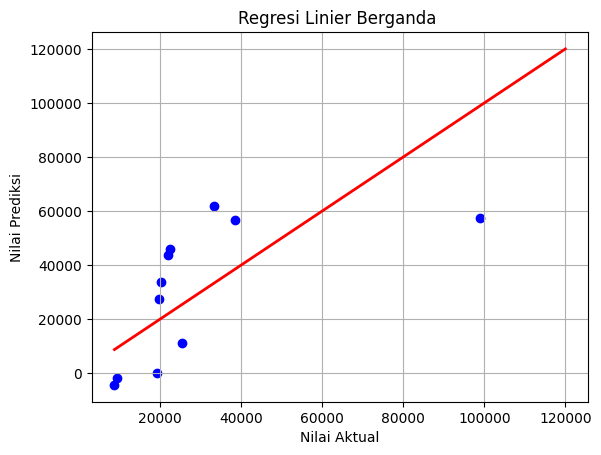

In [23]:
# Plotting Regresi Linier Berganda 
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], lw=2, color='red')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Regresi Linier Berganda ')
plt.grid(True)
plt.show()

In [24]:
# Menggunakan statsmodels untuk hasil yang lebih terperinci
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3.234
Date:                Tue, 25 Jun 2024   Prob (F-statistic):             0.0429
Time:                        10:45:01   Log-Likelihood:                -293.27
No. Observations:                  25   AIC:                             594.5
Df Residuals:                      21   BIC:                             599.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.632e+04   7

### Evaluate the residuals (errors) of a linear regression model and visualise their distribution

In [25]:
y_train_pred = model_sm.predict(X_train_sm)
residuals = y_train - y_train_pred

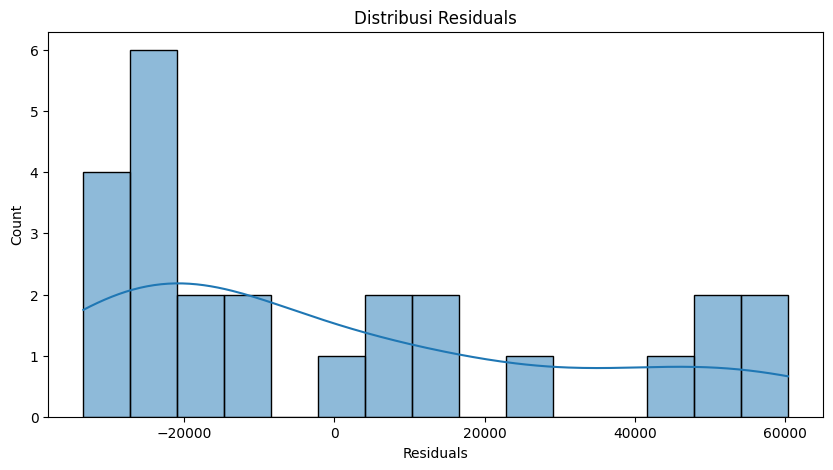

In [26]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=15)
plt.title('Distribusi Residuals')
plt.xlabel('Residuals')
plt.show()